<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- ~Load the data as a `pandas` data frame.~
- ~Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).~
- ~Validate that you have no missing values.~
- ~Add informative names to the features.~
- ~The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)~

~At the end, print the first five rows of the dataset to demonstrate the above.~

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_rows = 999


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=['age', 'year', 'nodes', 'survived_past_5_years'])

In [21]:
print(df.shape)
df.head()

(306, 4)


,age,year,nodes,survived_past_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
df.isna().sum()

age                      0
year                     0
nodes                    0
survived_past_5_years    0
dtype: int64

In [23]:
df['survived_past_5_years'].value_counts()

1    225
2     81
Name: survived_past_5_years, dtype: int64

In [24]:
df['survived_past_5_years'].replace(2,0, inplace=True)
df['survived_past_5_years'].value_counts()

1    225
0     81
Name: survived_past_5_years, dtype: int64

In [25]:
df.head()

,age,year,nodes,survived_past_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
age_bins = pd.cut(df['age'], 5)
year_bins = pd.cut(df['year'], 5)
nodes_bins = pd.cut(df['nodes'], 5)

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [27]:
df.describe()

,age,year,nodes,survived_past_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [88]:
ct = pd.crosstab(df['survived_past_5_years'], [age_bins,year_bins], normalize="columns")
ct.T

survived_past_5_years                 0         1
age            year                              
(29.947, 40.6] (57.989, 60.2]  0.050000  0.950000
               (60.2, 62.4]    0.000000  1.000000
               (62.4, 64.6]    0.000000  1.000000
               (64.6, 66.8]    0.285714  0.714286
               (66.8, 69.0]    0.200000  0.800000
(40.6, 51.2]   (57.989, 60.2]  0.370370  0.629630
               (60.2, 62.4]    0.117647  0.882353
               (62.4, 64.6]    0.400000  0.600000
               (64.6, 66.8]    0.235294  0.764706
               (66.8, 69.0]    0.384615  0.615385
(51.2, 61.8]   (57.989, 60.2]  0.222222  0.777778
               (60.2, 62.4]    0.294118  0.705882
               (62.4, 64.6]    0.166667  0.833333
               (64.6, 66.8]    0.562500  0.437500
               (66.8, 69.0]    0.222222  0.777778
(61.8, 72.4]   (57.989, 60.2]  0.437500  0.562500
               (60.2, 62.4]    0.300000  0.700000
               (62.4, 64.6]    0.333333  0.666667
               (64.6, 66.8]    0.153846  0.846154
               (66.8, 69.0]    0.090909  0.909091
(72.4, 83.0]   (57.989, 60.2]  1.000000  0.000000
               (60.2, 62.4]    0.000000  1.000000
               (62.4, 64.6]    0.000000  1.000000
               (64.6, 66.8]    0.666667  0.333333
               (66.8, 69.0]    0.000000  1.000000

In [82]:
df.groupby('year').agg('count')

,age,nodes,survived_past_5_years
year,,,
58,36,36,36
59,27,27,27
60,28,28,28
61,26,26,26
62,23,23,23
63,30,30,30
64,31,31,31
65,28,28,28
66,28,28,28


In [39]:
df.groupby('nodes').describe()

age                                     ... survived_past_5_years                      
       count       mean        std   min    25%  ...                   min   25%  50%   75%  max
nodes                                            ...                                            
0      136.0  53.705882  11.247464  30.0  44.00  ...                   0.0  1.00  1.0  1.00  1.0
1       41.0  52.000000  10.234745  30.0  45.00  ...                   0.0  1.00  1.0  1.00  1.0
2       20.0  51.300000  12.806659  31.0  42.75  ...                   0.0  0.75  1.0  1.00  1.0
3       20.0  53.500000  11.431719  30.0  46.75  ...                   0.0  0.00  1.0  1.00  1.0
4       13.0  49.000000   9.582971  31.0  43.00  ...                   0.0  1.00  1.0  1.00  1.0
5        6.0  51.333333   8.238123  38.0  47.50  ...                   0.0  0.00  0.0  0.75  1.0
6        7.0  48.571429   8.100558  37.0  44.50  ...                   0.0  0.00  1.0  1.00  1.0
7        7.0  50.571429   8.038597  34.0  49.50  ...                   0.0  0.50  1.0  1.00  1.0
8        7.0  56.714286  13.047532  41.0  44.50  ...                   0.0  0.50  1.0  1.00  1.0
9        6.0  51.166667  10.457852  34.0  46.25  ...                   0.0  0.00  0.0  0.75  1.0
10       3.0  38.666667   8.962886  33.0  33.50  ...                   0.0  0.50  1.0  1.00  1.0
11       4.0  47.000000   6.633250  38.0  45.50  ...                   0.0  0.00  0.0  0.25  1.0
12       2.0  50.000000   4.242641  47.0  48.50  ...                   0.0  0.25  0.5  0.75  1.0
13       5.0  52.800000  12.111978  35.0  50.00  ...                   0.0  0.00  0.0  0.00  1.0
14       4.0  53.750000  12.473305  43.0  44.50  ...                   0.0  0.75  1.0  1.00  1.0
15       3.0  52.333333  14.189198  37.0  46.00  ...                   0.0  0.00  0.0  0.50  1.0
16       1.0  44.000000        NaN  44.0  44.00  ...                   1.0  1.00  1.0  1.00  1.0
17       1.0  60.000000        NaN  60.0  60.00  ...                   0.0  0.00  0.0  0.00  0.0
18       1.0  55.000000        NaN  55.0  55.00  ...                   1.0  1.00  1.0  1.00  1.0
19       3.0  53.333333   9.018500  44.0  49.00  ...                   0.0  0.00  0.0  0.50  1.0
20       2.0  44.000000   2.828427  42.0  43.00  ...                   0.0  0.25  0.5  0.75  1.0
21       1.0  38.000000        NaN  38.0  38.00  ...                   0.0  0.00  0.0  0.00  0.0
22       3.0  61.333333   5.507571  55.0  59.50  ...                   0.0  0.50  1.0  1.00  1.0
23       3.0  47.333333   6.506407  41.0  44.00  ...                   0.0  0.00  0.0  0.00  0.0
24       1.0  53.000000        NaN  53.0  53.00  ...                   0.0  0.00  0.0  0.00  0.0
25       1.0  60.000000        NaN  60.0  60.00  ...                   1.0  1.00  1.0  1.00  1.0
28       1.0  63.000000        NaN  63.0  63.00  ...                   1.0  1.00  1.0  1.00  1.0
30       1.0  34.000000        NaN  34.0  34.00  ...                   1.0  1.00  1.0  1.00  1.0
35       1.0  59.000000        NaN  59.0  59.00  ...                   0.0  0.00  0.0  0.00  0.0
46       1.0  54.000000        NaN  54.0  54.00  ...                   1.0  1.00  1.0  1.00  1.0
52       1.0  43.000000        NaN  43.0  43.00  ...                   0.0  0.00  0.0  0.00  0.0

[31 rows x 24 columns]

In [81]:
ct = pd.crosstab(df['survived_past_5_years'], df['year'])
ct.T

survived_past_5_years,0,1
year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


In [75]:
df.groupby('year')['survived_past_5_years'].head()

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
23     1
24     0
25     1
28     1
29     1
30     1
31     1
33     1
34     0
35     1
36     1
37     1
38     1
39     1
40     1
42     1
44     0
45     0
49     1
50     1
51     1
52     1
53     0
58     1
59     1
72     1
76     1
78     1
79     1
87     1
90     0
91     0
93     1
99     1
105    1
155    1
170    0
181    0
Name: survived_past_5_years, dtype: int64

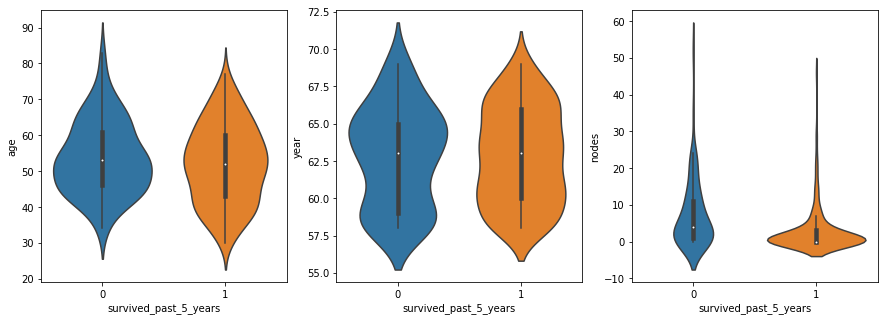

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survived_past_5_years', y=feature, data=df, ax=axes[idx])
plt.show()

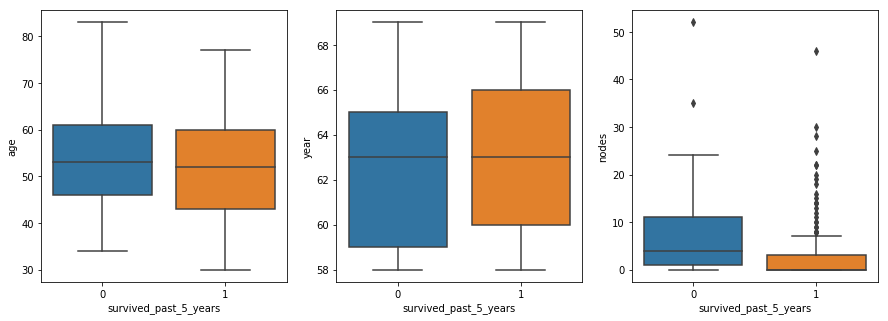

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survived_past_5_years', y=feature, data=df, ax=axes[idx])
plt.show()

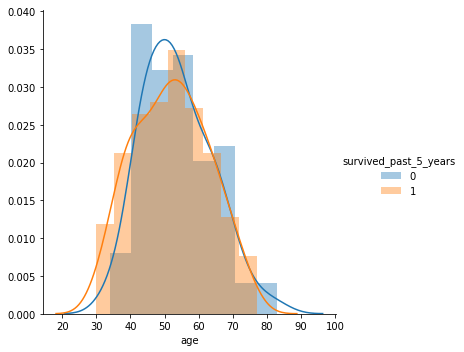

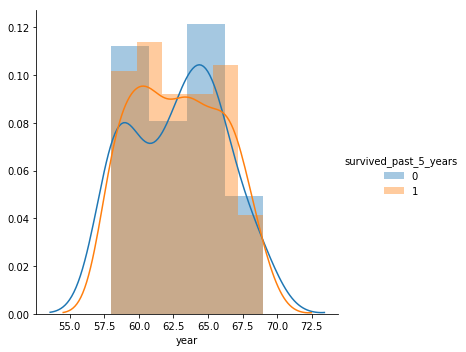

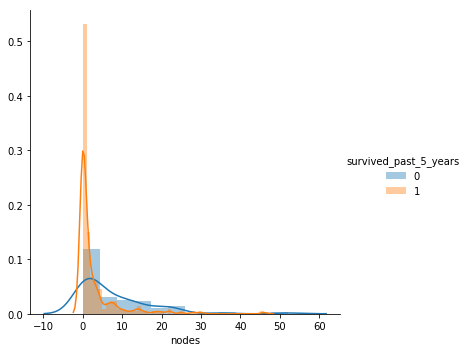

In [37]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survived_past_5_years', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [52]:
df[df['nodes'] > 5]['nodes'].value_counts()

6     7
7     7
8     7
9     6
13    5
11    4
14    4
15    3
10    3
23    3
22    3
19    3
12    2
20    2
52    1
16    1
17    1
46    1
21    1
24    1
25    1
28    1
30    1
35    1
18    1
Name: nodes, dtype: int64

In [0]:
less_than_10_nodes = df[df['nodes'] < 10]

In [54]:
less_than_10_nodes.describe()

,age,year,nodes,survived_past_5_years
count,263.000000,263.000000,263.000000,263.000000
mean,52.756654,62.866920,1.612167,0.783270
std,10.936043,3.263458,2.396277,0.412803
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,0.000000,1.000000
75%,61.000000,66.000000,2.500000,1.000000
max,83.000000,69.000000,9.000000,1.000000


In [60]:
ct = pd.crosstab(less_than_10_nodes['survived_past_5_years'], [less_than_10_nodes['nodes'], year_bins, age_bins], normalize="columns")
ct.T

survived_past_5_years                       0         1
nodes year           age                               
0     (57.989, 60.2] (29.947, 40.6]  0.111111  0.888889
                     (40.6, 51.2]    0.142857  0.857143
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.400000  0.600000
      (60.2, 62.4]   (40.6, 51.2]    0.111111  0.888889
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.000000  1.000000
                     (72.4, 83.0]    0.000000  1.000000
      (62.4, 64.6]   (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.500000  0.500000
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.142857  0.857143
                     (72.4, 83.0]    0.000000  1.000000
      (64.6, 66.8]   (29.947, 40.6]  0.250000  0.750000
                     (40.6, 51.2]    0.200000  0.800000
                     (51.2, 61.8]    0.400000  0.600000
                     (61.8, 72.4]    0.000000  1.000000
      (66.8, 69.0]   (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.250000  0.750000
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.000000  1.000000
                     (72.4, 83.0]    0.000000  1.000000
1     (57.989, 60.2] (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.500000  0.500000
      (60.2, 62.4]   (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.000000  1.000000
                     (72.4, 83.0]    0.000000  1.000000
      (62.4, 64.6]   (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.500000  0.500000
                     (61.8, 72.4]    1.000000  0.000000
      (64.6, 66.8]   (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.500000  0.500000
                     (72.4, 83.0]    1.000000  0.000000
      (66.8, 69.0]   (40.6, 51.2]    0.500000  0.500000
                     (51.2, 61.8]    0.500000  0.500000
                     (61.8, 72.4]    0.000000  1.000000
2     (57.989, 60.2] (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.500000  0.500000
                     (51.2, 61.8]    0.500000  0.500000
                     (61.8, 72.4]    0.000000  1.000000
                     (72.4, 83.0]    1.000000  0.000000
      (60.2, 62.4]   (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    1.000000  0.000000
      (62.4, 64.6]   (40.6, 51.2]    0.000000  1.000000
      (64.6, 66.8]   (51.2, 61.8]    0.000000  1.000000
      (66.8, 69.0]   (51.2, 61.8]    0.000000  1.000000
                     (61.8, 72.4]    0.000000  1.000000
3     (57.989, 60.2] (40.6, 51.2]    0.333333  0.666667
                     (51.2, 61.8]    0.250000  0.750000
      (60.2, 62.4]   (29.947, 40.6]  0.000000  1.000000
                     (51.2, 61.8]    1.000000  0.000000
      (62.4, 64.6]   (40.6, 51.2]    0.000000  1.000000
      (64.6, 66.8]   (51.2, 61.8]    1.000000  0.000000
                     (72.4, 83.0]    0.500000  0.500000
      (66.8, 69.0]   (40.6, 51.2]    1.000000  0.000000
                     (51.2, 61.8]    0.333333  0.666667
                     (61.8, 72.4]    0.000000  1.000000
4     (57.989, 60.2] (40.6, 51.2]    0.000000  1.000000
                     (51.2, 61.8]    0.500000  0.500000
                     (61.8, 72.4]    1.000000  0.000000
      (60.2, 62.4]   (40.6, 51.2]    0.000000  1.000000
      (62.4, 64.6]   (29.947, 40.6]  0.000000  1.000000
                     (51.2, 61.8]    0.000000  1.000000
      (64.6, 66.8]   (29.947, 40.6]  0.000000  1.000000
                     (40.6, 51.2]    0.000000  1.000000
                     (51

In [91]:
df.corr()

,age,year,nodes,survived_past_5_years
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survived_past_5_years,-0.067950,0.004768,-0.286768,1.000000


In [92]:
less_than_10_nodes.corr()

,age,year,nodes,survived_past_5_years
age,1.000000,0.076945,-0.062602,-0.059919
year,0.076945,1.000000,0.014850,-0.024325
nodes,-0.062602,0.014850,1.000000,-0.243497
survived_past_5_years,-0.059919,-0.024325,-0.243497,1.000000


In [103]:
df[df['nodes'] > 10].corr()

,age,year,nodes,survived_past_5_years
age,1.000000,0.097446,-0.016576,-0.194951
year,0.097446,1.000000,-0.039576,0.218658
nodes,-0.016576,-0.039576,1.000000,0.047922
survived_past_5_years,-0.194951,0.218658,0.047922,1.000000


In [96]:
ct = pd.crosstab(df['survived_past_5_years'], df['age'], normalize="columns")
ct.T

survived_past_5_years,0,1
age,,
30,0.000000,1.000000
31,0.000000,1.000000
33,0.000000,1.000000
34,0.285714,0.714286
35,0.000000,1.000000
36,0.000000,1.000000
37,0.000000,1.000000
38,0.100000,0.900000
39,0.166667,0.833333


In [101]:
ct = pd.crosstab(df['nodes'], df['year'], normalize='columns')
ct

year,58,59,60,61,62,63,64,65,66,67,68,69
nodes,,,,,,,,,,,,
0,0.444444,0.296296,0.392857,0.423077,0.391304,0.466667,0.548387,0.464286,0.535714,0.44,0.615385,0.272727
1,0.166667,0.037037,0.250000,0.153846,0.130435,0.133333,0.129032,0.071429,0.107143,0.20,0.076923,0.090909
2,0.083333,0.296296,0.035714,0.076923,0.043478,0.033333,0.032258,0.000000,0.035714,0.04,0.076923,0.000000
3,0.083333,0.074074,0.071429,0.000000,0.130435,0.033333,0.032258,0.071429,0.035714,0.08,0.000000,0.272727
4,0.055556,0.000000,0.071429,0.038462,0.000000,0.066667,0.032258,0.071429,0.071429,0.00,0.076923,0.000000
5,0.000000,0.000000,0.035714,0.038462,0.086957,0.000000,0.000000,0.035714,0.000000,0.04,0.000000,0.000000
6,0.000000,0.037037,0.000000,0.038462,0.043478,0.066667,0.032258,0.035714,0.000000,0.00,0.000000,0.000000
7,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.08,0.076923,0.090909
8,0.000000,0.074074,0.000000,0.038462,0.000000,0.000000,0.032258,0.035714,0.000000,0.04,0.000000,0.090909


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**The data set it way to small to make any real assertions.**

* For the first few years, there was a positve relationship between year and survival, but the number of cases in the last years isn't enough to say for sure. Also if you have more than 10 nodes, the year has a postive relationship.
* Number of positive axillary nodes detected and survival appear to have a negative relationship, as the number of nodes increases, survival rate decreases.
* Number of nodes and year don't appear to have any relationship. So that might mean that early decation methods didn't change much during that time.

